In [1]:
%matplotlib notebook

# 2) Line bands interative inspection

In the previous tutorial, we measured one line from the OSIRIS spectrum of the galaxy GP121903. Before proceding to analyze the full spectrum, however, it is recommended to confirm the presence of lines.

In this tutorial, we are going to compare $LiMe$ lines database with the emission features observed in this spectrum. To do that we are going to use the ``Spectrum.check.bands`` function to iteratively adjust the observed bands to our instrument and observation. 

If you are using a jupyter notebook, it is easier to use the ``%matplotlib ql`` backend at the top of your notebook, for a better iteration with your plots.

This tutorial is available as a script and a notebook in the in the [github examples folder](https://github.com/Vital-Fernandez/lime/tree/master/examples).. The galaxy spectrum is also available in the [github sample data](https://github.com/Vital-Fernandez/lime/tree/master/examples/sample_data).

## Loading the data

Let's start by importing the script packages and defining a function to read the ISIS spectrograph *.fits* files:

In [15]:
import numpy as np
from astropy.io import fits
from pathlib import Path
from IPython.display import Image, display

In [7]:
# This try import is only necessary for the developper to compile the documentation from this notebook
try:
    import lime
except ImportError:
    import sys
    sys.path.append('../src')
    import lime

In [8]:
def import_osiris_fits(file_address, ext=0):

    # Open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header

    # Reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header['CRVAL1'],  header['CD1_1'], header['NAXIS1']
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)

    return wavelength, data, header

In [9]:
# State the scientific data
obsFitsFile = './sample_data/gp121903_ISIS_spectrum.fits'
z_obj = 0.19531
norm_flux = 1e-18

# Load spectrum
wave, flux, header = import_osiris_fits(obsFitsFile)

Now we can define our ``lime.Spectrum`` object:

<IPython.core.display.Javascript object>


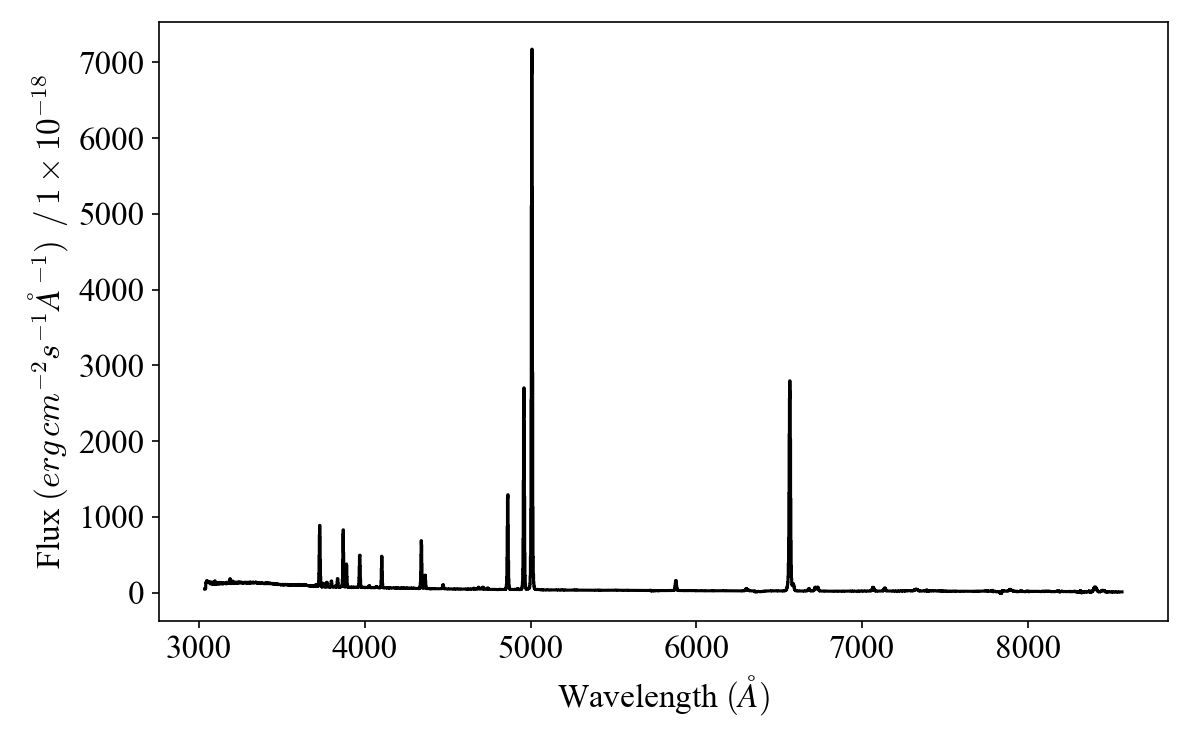

In [10]:
gp_spec = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=norm_flux, units_wave='A', units_flux='Flam')
gp_spec.plot.spectrum(rest_frame=True)

The ``lime.spectral_bands`` allow us to import a dataframe with the  of line bands:

In [11]:
bands_df = lime.spectral_bands()

In [12]:
print(bands_df)

                  w1        w2            w3             w4        w5  \
H1_1216A      1100.0    1150.0    1195.00000    1230.000000    1250.0   
C4_1548A      1400.0    1450.0    1530.00000    1565.000000    1600.0   
He2_1640A     1600.0    1630.0    1635.00000    1645.000000    1700.0   
O3_1666A      1600.0    1630.0    1660.00000    1680.000000    1700.0   
C3_1909A      1870.0    1895.0    1898.18782    1912.243544    1930.0   
...              ...       ...           ...            ...       ...   
H1_37406A    37365.0   37385.0   37395.00000   37415.000000   37425.0   
H1_40523A    40490.0   40500.0   40510.00000   40535.000000   40550.0   
H1_46538A    46510.0   46515.0   46534.00000   46546.000000   46555.0   
S4_105105A  104700.0  104900.0  105000.00000  105200.000000  105300.0   
S3_187130A  186700.0  186900.0  187100.00000  187160.000000  187200.0   

                  w6  
H1_1216A      1300.0  
C4_1548A      1650.0  
He2_1640A     1750.0  
O3_1666A      1750.0  
C3_1909A

The default database is too large for an indivual spectrum. You can provide a wavelength range (in the rest frame) to constrain the output lines. Incidentally, you can also provide a ``lime.Spectrum`` to state the wavelength limits:

In [13]:
bands_df = lime.spectral_bands(wave_inter=gp_spec)

In [14]:
print(bands_df)

                    w1           w2           w3           w4           w5  \
Ne5_3426A  3390.000000  3410.000000  3420.000000  3430.000000  3445.000000   
H1_3704A   3671.309441  3681.364925  3700.450000  3709.100000  3758.000000   
O2_3726A   3665.750000  3694.260000  3716.020000  3743.700000  3754.880000   
O2_3729A   3665.750000  3694.260000  3716.020000  3743.700000  3754.880000   
H1_3750A   3664.503848  3675.720417  3746.433569  3756.674784  3775.220000   
H1_3771A   3759.191222  3767.280375  3767.467189  3775.787336  3776.807987   
H1_3798A   3780.949179  3792.078244  3793.707971  3803.676860  3807.127865   
H1_3835A   3823.148476  3829.538777  3831.331855  3840.896149  3844.260000   
Ne3_3869A  3848.429950  3858.099497  3862.724063  3876.597761  3895.538694   
H1_3889A   3842.087829  3861.282614  3880.390000  3899.420000  3905.000000   
H1_3970A   3945.566344  3957.862489  3962.153343  3976.592758  3979.317175   
He1_4026A  4013.837737  4021.250734  4021.502052  4032.149534  4

In addition to the wavelength range, you can also constrain the output table based on a list of ionic species. Moreover, you can also state the labels and wavelength units.   

A bands dataframe/file consists in a table, where the line bands wavelength limits are stored space-separated columns. The first column has the line label (in the $LiMe$ format). The remaining 6 columns specify the line location along with two adjacent continua regions. The image belows shows and example with the H1_3889A bands:
    

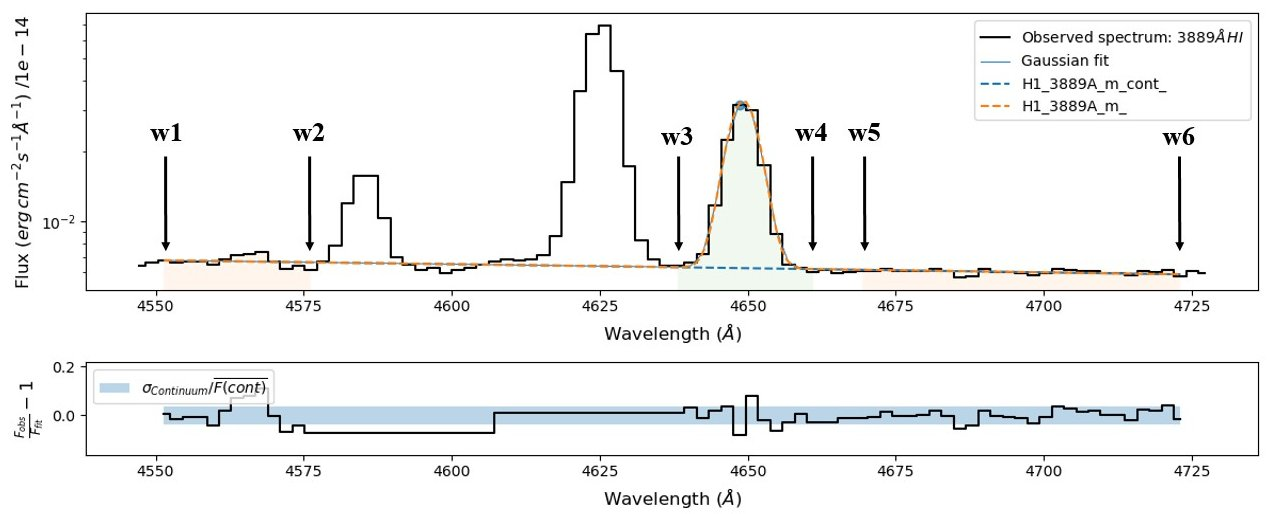

In [27]:
display(Image(filename='..\docs\source\_static\mask_selection.jpg'))

<div class="alert alert-info">

**Please remember:** The band wavelengths must be on the rest frame and sorted from lower to higher values. Finally, make sure that these wavelengths are in the same units as those from your spectrum. 

</div>

We can save these bands using ``lime.save_log`` function:

In [32]:
# Save to a file (if it does not exist already)
bands_df_file = Path('./sample_data/GP121903_bands.txt')
if bands_df_file.is_file() is not True:
    lime.save_log(bands_df, bands_df_file)

Running the ``Spectrum.check.bands`` function opens the interactive window:

<IPython.core.display.Javascript object>


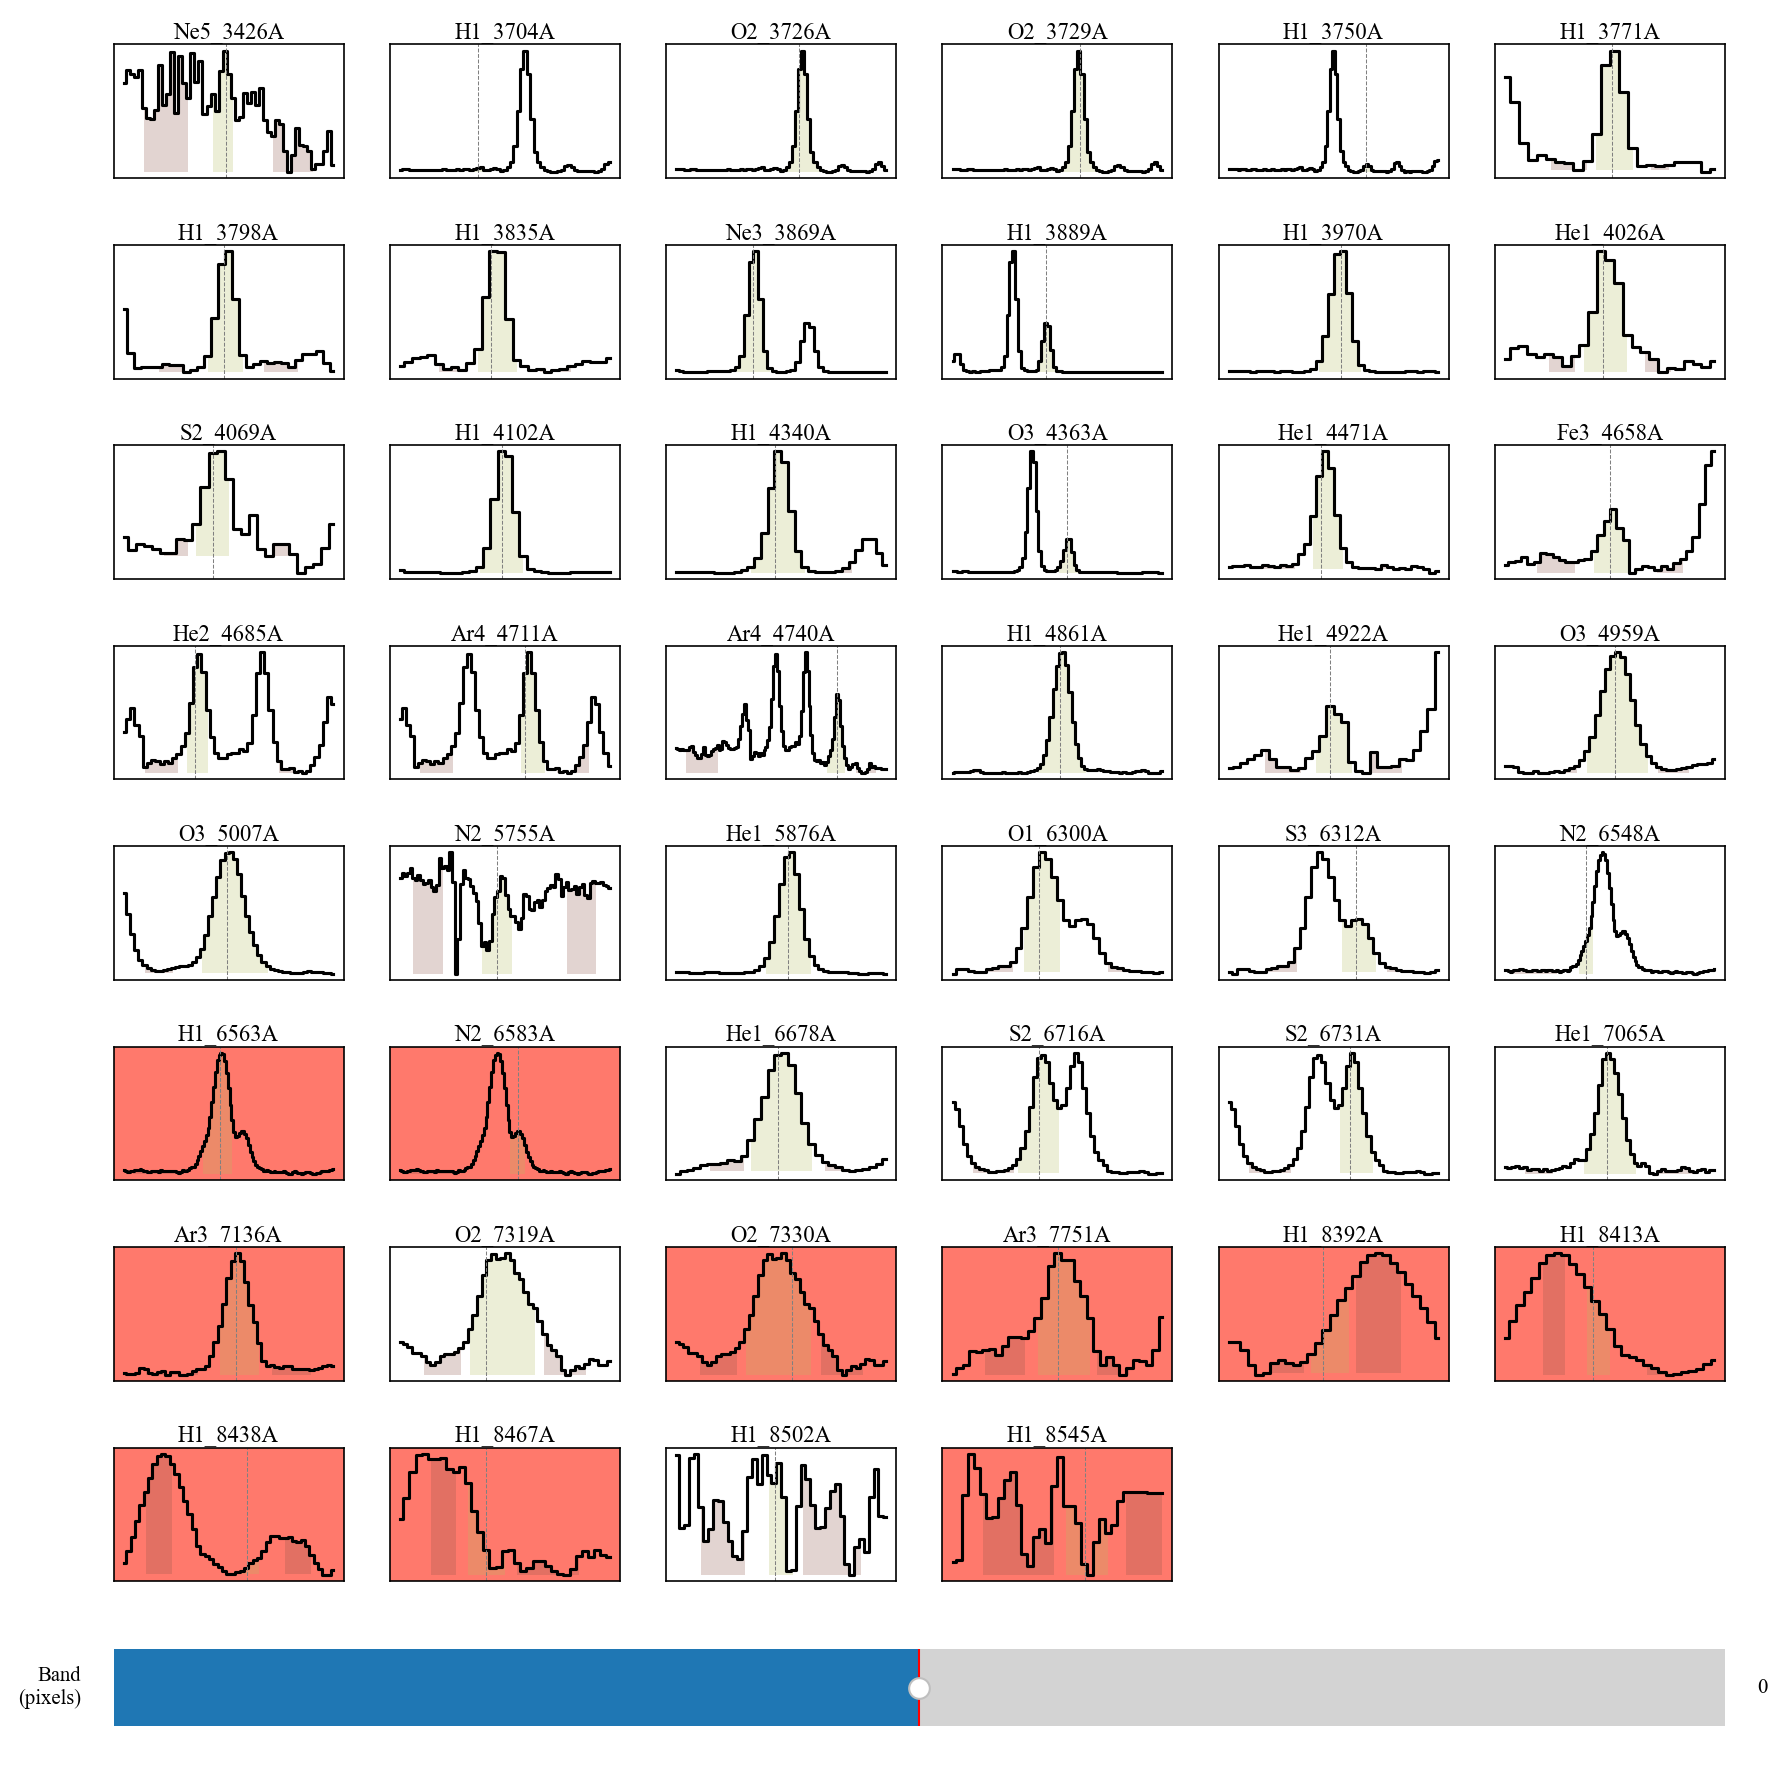

In [33]:
# Review the bands file
gp_spec.check.bands(bands_df_file)

There are several ways to interact with the plots in this grid:
* Right-click on any plot will remove the line from the output bands file. This will switch the background color to red.
* Middle-click on any plot will change the line label suffix on the output bands file. The options are blended ("_b"), merged ("_m") and single (no suffix) lines. This will change line label the plot title correspondingly.
* Left-click and drag allows you to change the bands limits.

In the lattest case, the The line or continua band adjusted depends on the initical click point. There are some caveats in the window selection:
* The plot wavelength range is always 5 pixels beyond the mask bands. Therefore dragging the mouse beyond the mask limits (below w1 or above w6) will change the displayed range. This can be used to move beyond the original mask limits.
* Selections between the w2 and w5 wavelength bands are always assigned to the line region mask as the new w3 and w4 values.
* Due to the previous point, to increase the w2 value or to decrease w5 value the user must select a region between w1 and w3 or w4 and w6 respectively.

Each of these adjustments is stored in the input ``bands_file``.

By default, the ``Spectrum.check.bands`` function compares the input bands file with the default bands database. Consequently, if you ran the script above again, you will still have lines with a red background from lines in the database but not in your previous selection. You can provide your own database (file or dataframe) in the ``parent_bands`` attribute of the  ``Spectrum.check.bands`` function.

At the bottom of the window you can find an slider with the *Band (pixels)*. This slider moves all the bands simultaneously either towards the blue and red limits. 

Finally, the ``Spectrum.check.bands`` function also gives you the oportunity to seet the effect of the spectrum redshift on the bands selection on a pixel bases and save the new value to a text file (or modify the existing value):

<IPython.core.display.Javascript object>


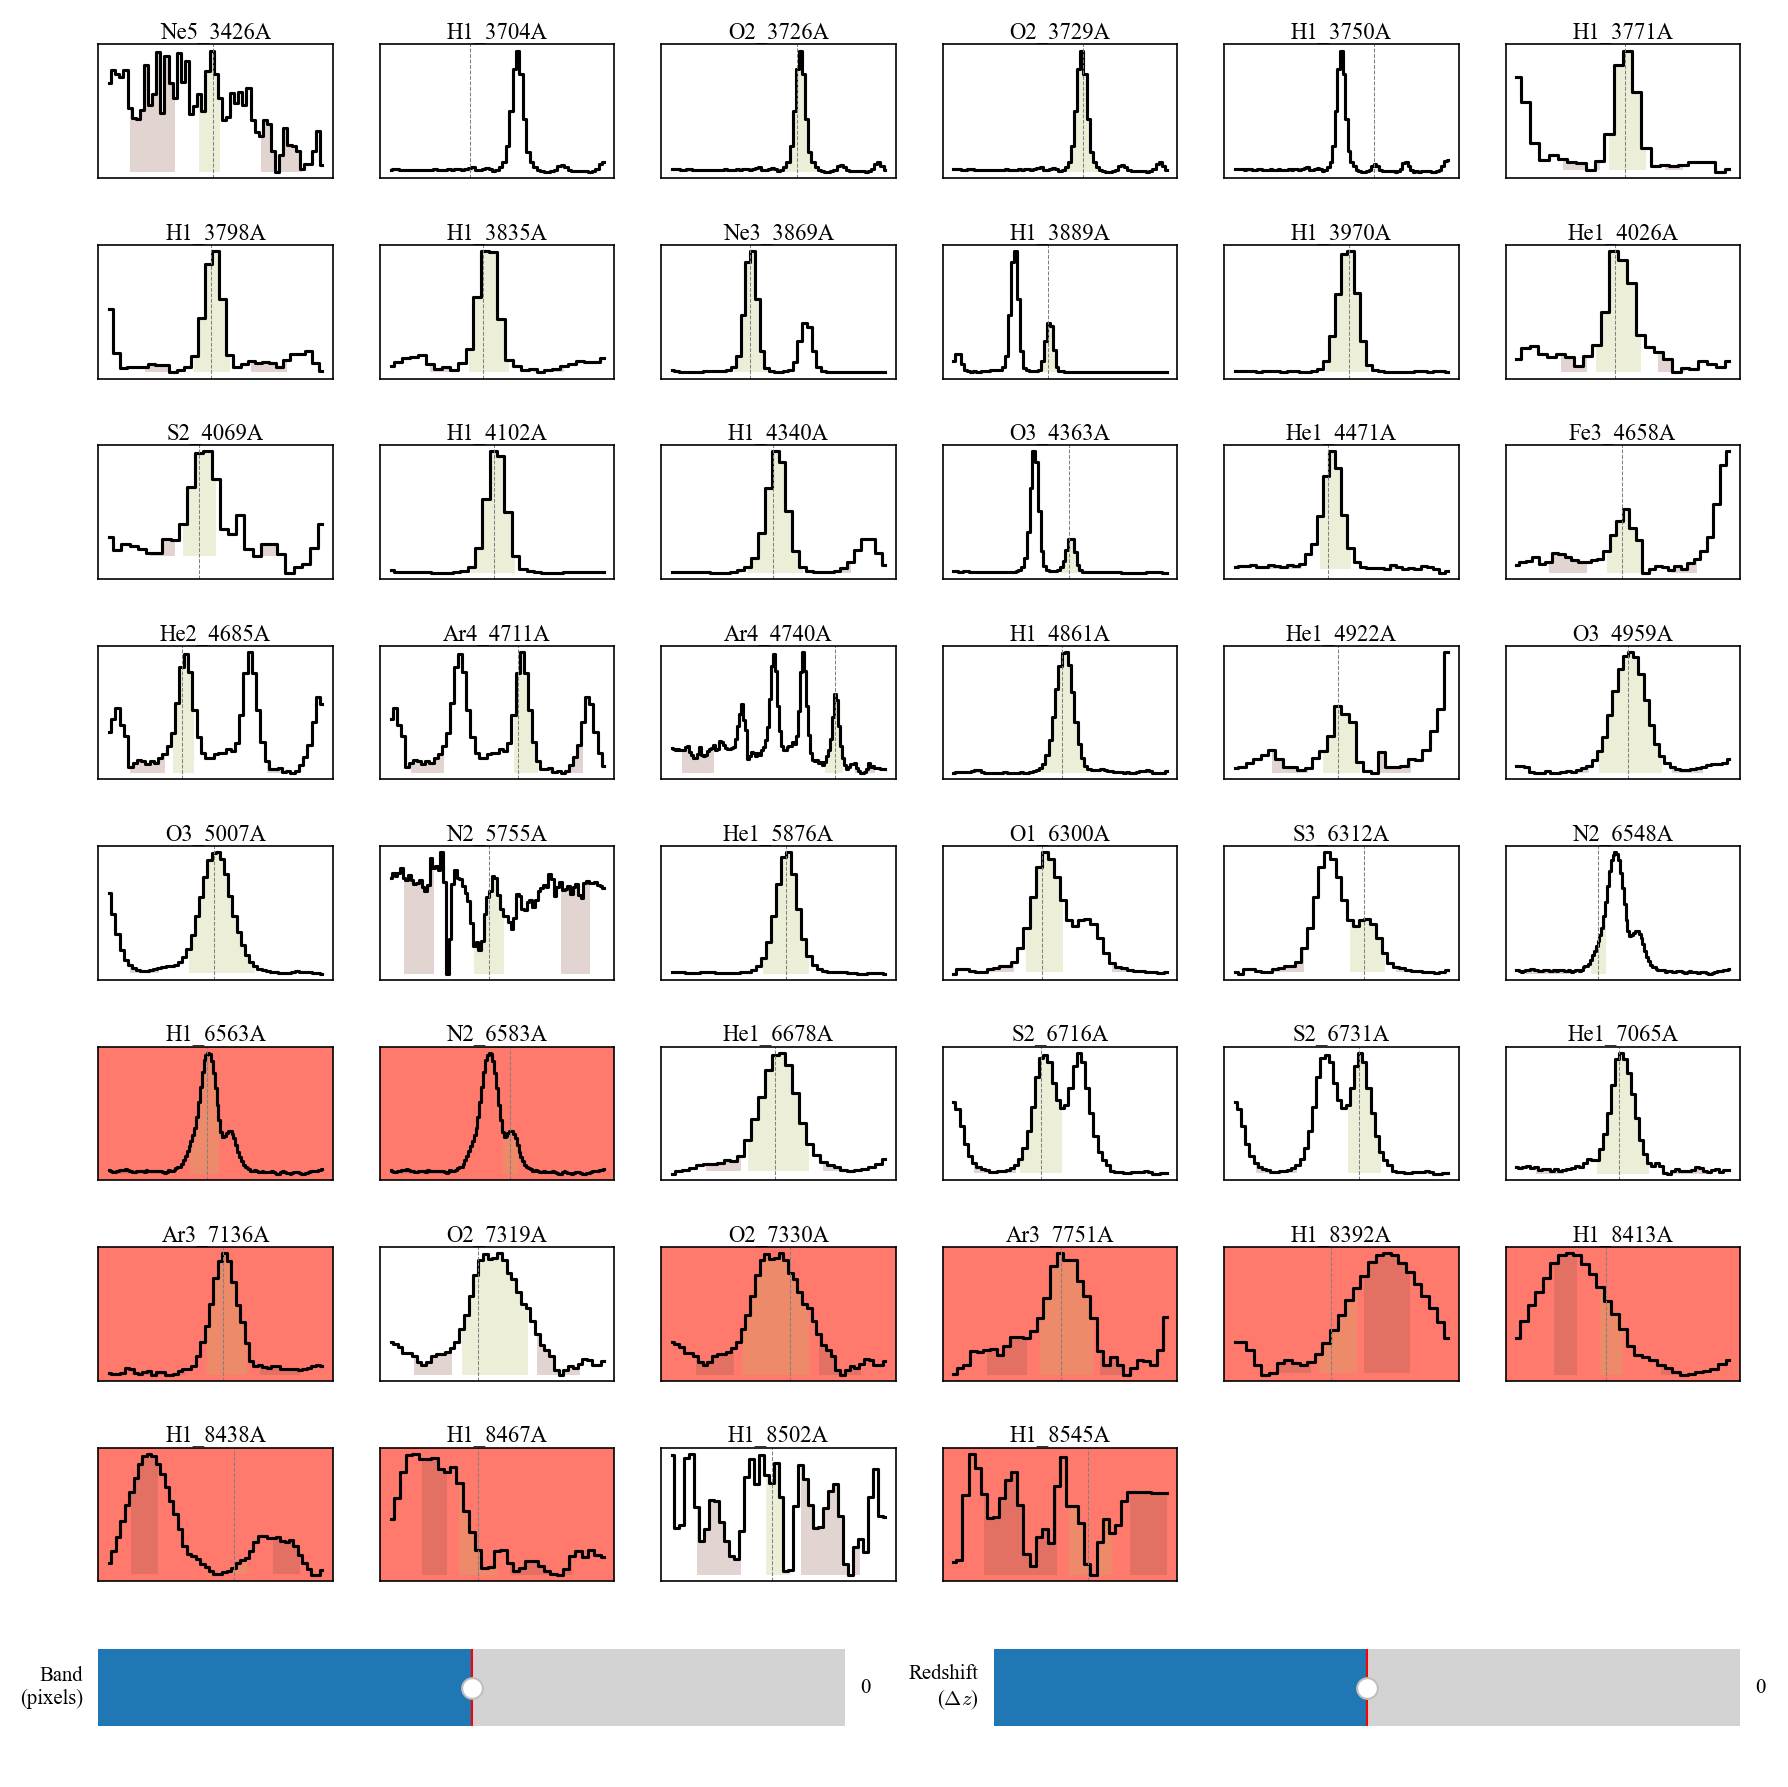

In [34]:
# Adding a redshift file address to store the variations in redshift
redshift_file = './sample_data/redshift_log.txt'
redshift_file_header, object_ref = 'redshift', 'GP121903'
gp_spec.check.bands(bands_df_file, maximize=True, redshift_log=redshift_file,
                    redshift_column=redshift_file_header, object_ref='object_ref')

The redshift new redshift is stored to the output file but the original ``redshift`` of the ``lime.Spectrum`` does not change. (this behaviour shall be change in a future update). 